# Water Sanitation Coverage of the Athi River Water Service Board

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import string
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [2]:
data = pd.read_csv('Water_Sanitation_Coverage_of_the_Athi_River_Water_and_Service_board.csv')
dataset.copy()
print(data.shape)
data.head()

(8, 9)


,Type_of_Coverage,Date,Total_Pop,Annual_Pop_Growth,Coverage_%,Additional_Pop,Served_Pop,Non_served_Pop,OBJECTID
0,Sanitation,01/01/2011 12:00:00 AM,5291841,0,67%,0,3566701,1725140,0
1,Sanitation,01/01/2012 12:00:00 AM,5434721,142880,66%,20215,3586916,1929014,1
2,Sanitation,01/01/2013 12:00:00 AM,5581458,146737,66%,85684,3672599,1955860,2
3,Sanitation,01/01/2014 12:00:00 AM,5732157,150699,71%,368572,4041171,1690986,3
4,Water,01/01/2011 12:00:00 AM,5291841,0,62%,0,3265066,2026775,4


In [3]:
data.dtypes

Type_of_Coverage     object
Date                 object
Total_Pop             int64
Annual_Pop_Growth     int64
Coverage_%           object
Additional_Pop        int64
Served_Pop            int64
Non_served_Pop        int64
OBJECTID              int64
dtype: object

In [4]:
data['Date'][0]

'01/01/2011 12:00:00 AM'

In [5]:
import datetime
data['Date'] = data['Date'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p'))
type(data['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
# extract the index year from the date variable
data['Year'] = pd.DatetimeIndex(data['Date']).year
data.head(3)

,Type_of_Coverage,Date,Total_Pop,Annual_Pop_Growth,Coverage_%,Additional_Pop,Served_Pop,Non_served_Pop,OBJECTID,Year
0,Sanitation,2011-01-01 12:00:00,5291841,0,67%,0,3566701,1725140,0,2011
1,Sanitation,2012-01-01 12:00:00,5434721,142880,66%,20215,3586916,1929014,1,2012
2,Sanitation,2013-01-01 12:00:00,5581458,146737,66%,85684,3672599,1955860,2,2013


In [8]:
data.drop('OBJECTID', axis=1, inplace=True)

KeyError: "['OBJECTID'] not found in axis"

In [10]:
data['Coverage_%'] = data['Coverage_%'].replace('%', '', regex=True)
data['Coverage_%'] = data['Coverage_%'].apply(lambda x: int(x))
data['Coverage_%'][0]
type(data['Coverage_%'][0])

numpy.int64

In [11]:
data['Type_of_Coverage'].unique()

array(['Sanitation', 'Water'], dtype=object)

In [12]:
pd.options.display.max_rows=None
data.isnull().any()

Type_of_Coverage     False
Date                 False
Total_Pop            False
Annual_Pop_Growth    False
Coverage_%           False
Additional_Pop       False
Served_Pop           False
Non_served_Pop       False
Year                 False
dtype: bool

In [20]:
data.iloc[:, [0,6,8]].groupby(['Type_of_Coverage', 'Year'], as_index=False).sum().pivot('Type_of_Coverage', 'Year')

Served_Pop                           
Year                   2011     2012     2013     2014
Type_of_Coverage                                      
Sanitation          3566701  3586916  3672599  4041171
Water               3265066  3396521  3756970  4143976

In [66]:
data.describe()

,Total_Pop,Annual_Pop_Growth,Coverage_%,Additional_Pop,Served_Pop,Non_served_Pop,Year
count,8.000000e+00,8.000000,8.00000,8.000000,8.000000e+00,8.000000e+00,8.000000
mean,5.510044e+06,110079.000000,66.25000,169172.625000,3.678740e+06,1.875076e+06,2012.500000
std,1.754344e+05,68006.481216,3.24037,173871.150787,2.989784e+05,1.847379e+05,1.195229
min,5.291841e+06,0.000000,62.00000,0.000000,3.265066e+06,1.588181e+06,2011.000000
25%,5.399001e+06,107160.000000,65.00000,15161.250000,3.524156e+06,1.716602e+06,2011.750000
50%,5.508090e+06,144808.500000,66.00000,108569.500000,3.629758e+06,1.942437e+06,2012.500000
75%,5.619133e+06,147727.500000,67.75000,362479.750000,3.828020e+06,1.980772e+06,2013.250000
max,5.732157e+06,150699.000000,71.00000,387006.000000,4.143976e+06,2.119217e+06,2014.000000


In [21]:
def count_plot(var, x_label_rotation=0):
    fig, ax = plt.subplots()
    fig.set_size_inches(25, 10)
    sns.countplot(x=var, data=data)
    ax.set_xlabel(var, fontsize=30)
    ax.set_ylabel('value count', fontsize=30)
    ax.set_title('Frequency distribution of ' + var, fontsize=30)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=x_label_rotation, fontsize=15)

In [24]:
def bar_plot(cat, con, x_label_rotation=0):
    fig, ax = plt.subplots()
    fig.set_size_inches(25, 10)
    sns.barplot(x=cat, y=con, data=data)
    ax.set_xlabel(cat, fontsize=30)
    ax.set_ylabel('value counts for '+ con, fontsize=30)
    ax.set_title('Frequency distribution of ' + con + ' per ' + cat, fontsize=30)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=x_label_rotation, fontsize=15)
    plt.show()

In [42]:
def cat_plot(labels, x_label_rotation=0):
    sns.catplot(x='Year', y=labels, data=data, col='Type_of_Coverage', kind="bar")

In [28]:
data.head()

,Type_of_Coverage,Date,Total_Pop,Annual_Pop_Growth,Coverage_%,Additional_Pop,Served_Pop,Non_served_Pop,Year
0,Sanitation,2011-01-01 12:00:00,5291841,0,67,0,3566701,1725140,2011
1,Sanitation,2012-01-01 12:00:00,5434721,142880,66,20215,3586916,1929014,2012
2,Sanitation,2013-01-01 12:00:00,5581458,146737,66,85684,3672599,1955860,2013
3,Sanitation,2014-01-01 12:00:00,5732157,150699,71,368572,4041171,1690986,2014
4,Water,2011-01-01 12:00:00,5291841,0,62,0,3265066,2026775,2011


## Distribution of the visuals for each variable

### 1. Type of Coverage

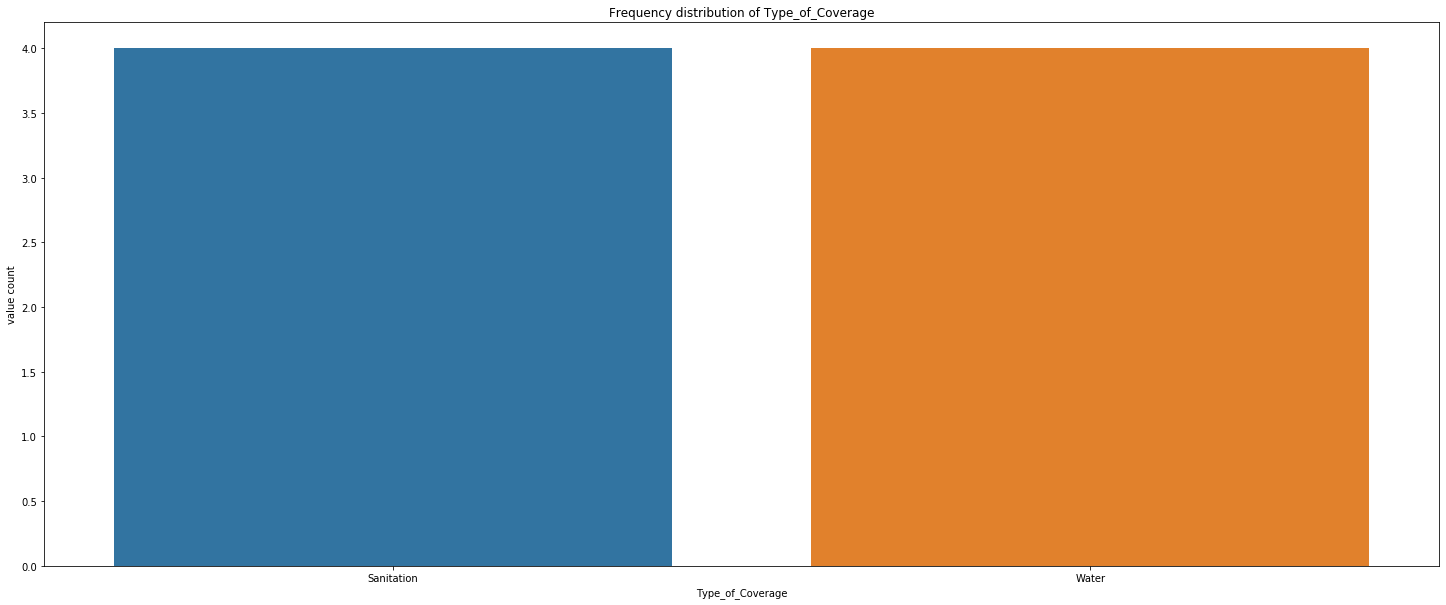

In [25]:
count_plot('Type_of_Coverage')

### 2. Years

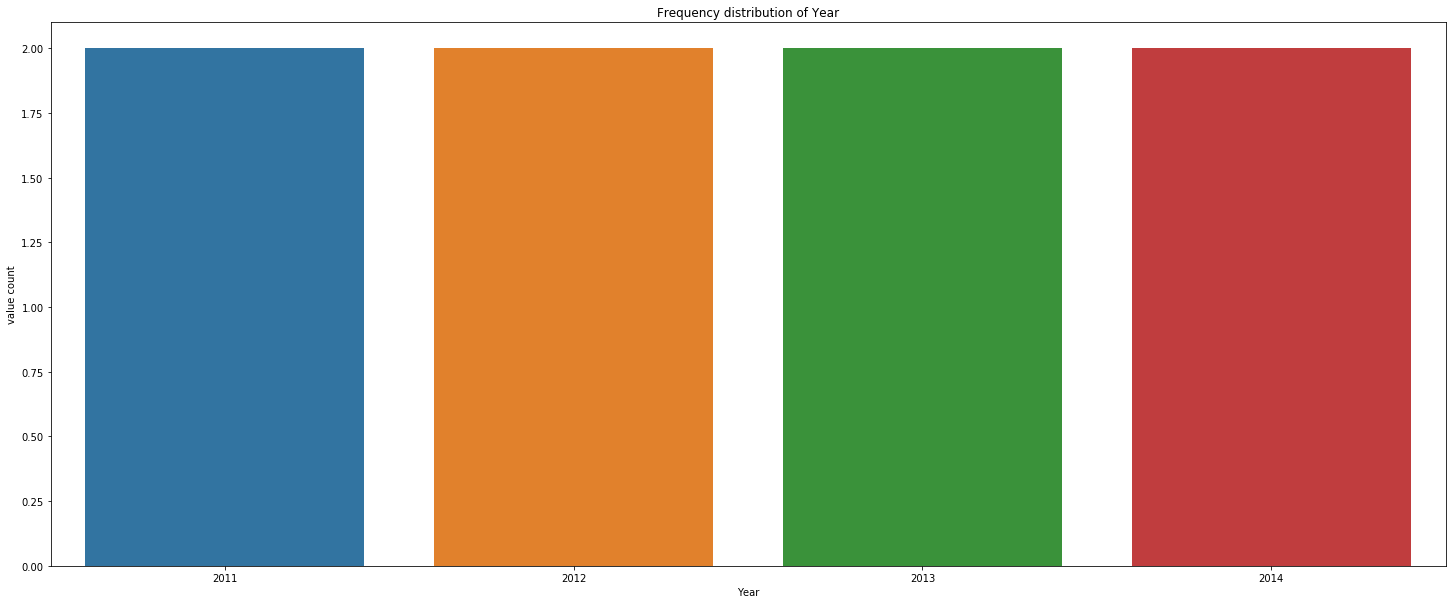

In [27]:
count_plot('Year')

### 3. Total population per Coverage

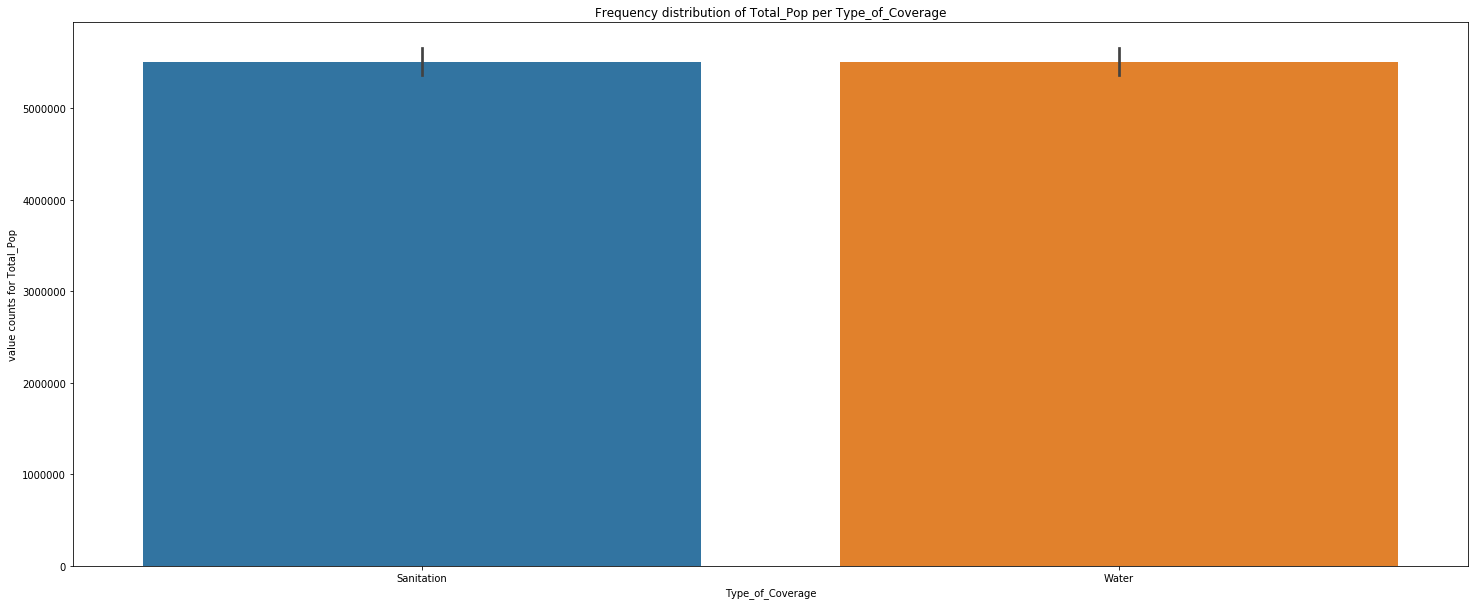

In [30]:
bar_plot('Type_of_Coverage', 'Total_Pop')

### 4. Annual population Growth per coverage

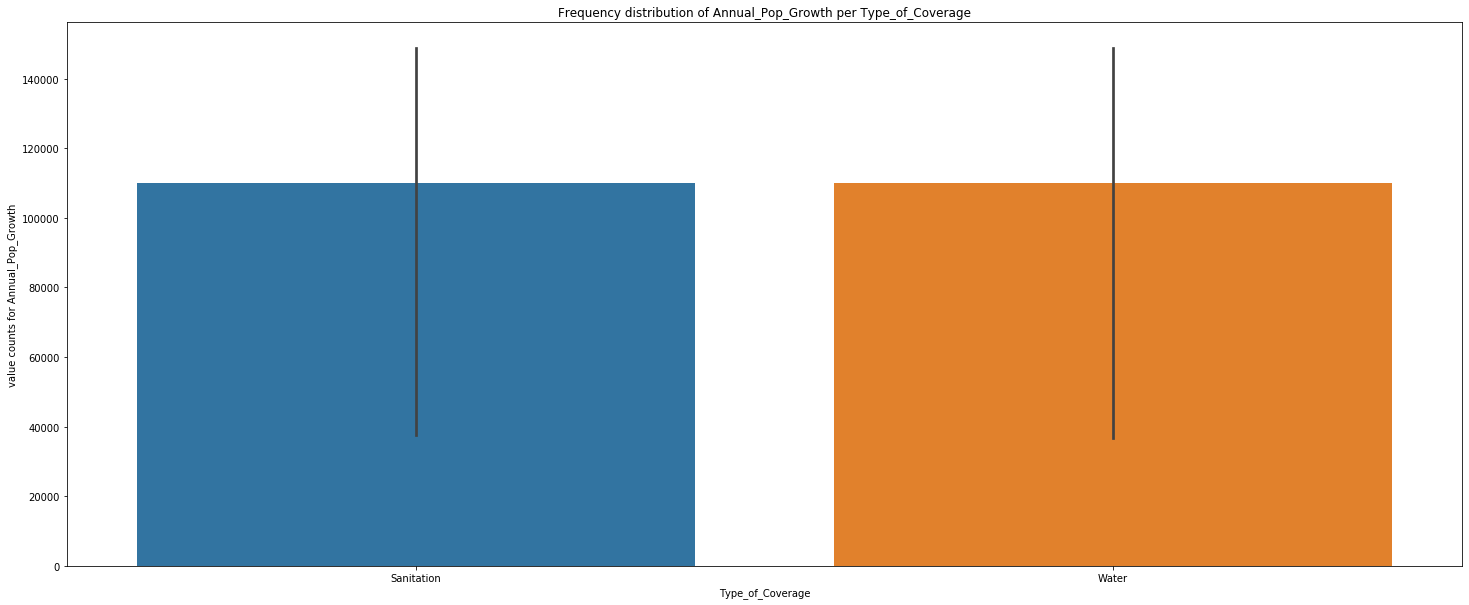

In [31]:
bar_plot('Type_of_Coverage', 'Annual_Pop_Growth')

## Categorical Plots

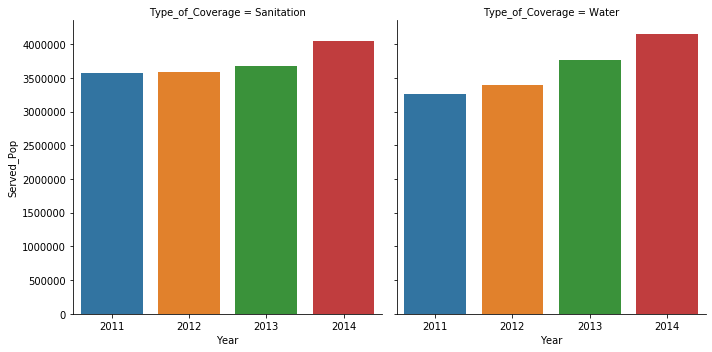

In [43]:
cat_plot('Served_Pop')

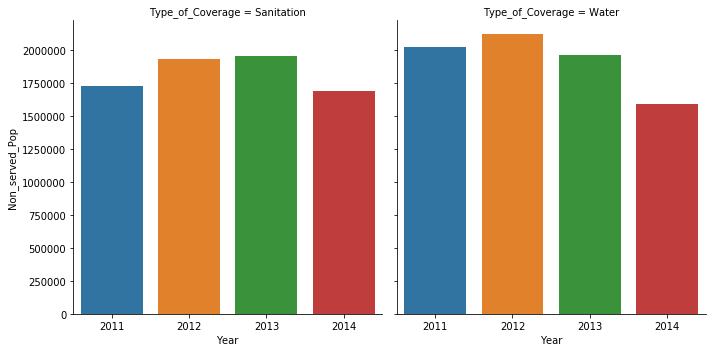

In [45]:
cat_plot('Non_served_Pop')

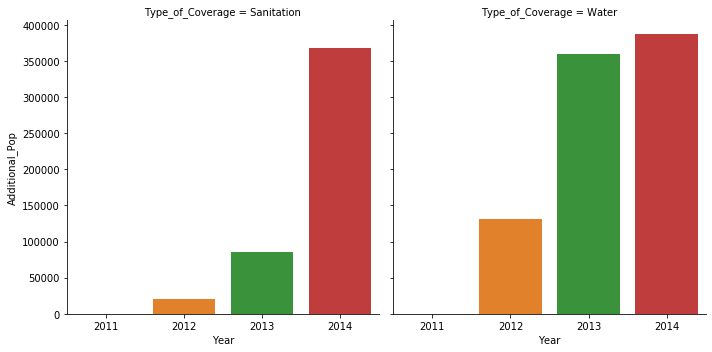

In [46]:
cat_plot('Additional_Pop')

In [47]:
data.columns

Index(['Type_of_Coverage', 'Date', 'Total_Pop', 'Annual_Pop_Growth',
       'Coverage_%', 'Additional_Pop', 'Served_Pop', 'Non_served_Pop', 'Year'],
      dtype='object')

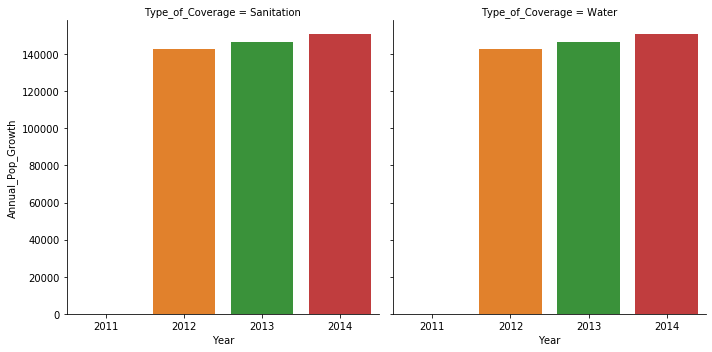

In [48]:
cat_plot('Annual_Pop_Growth')

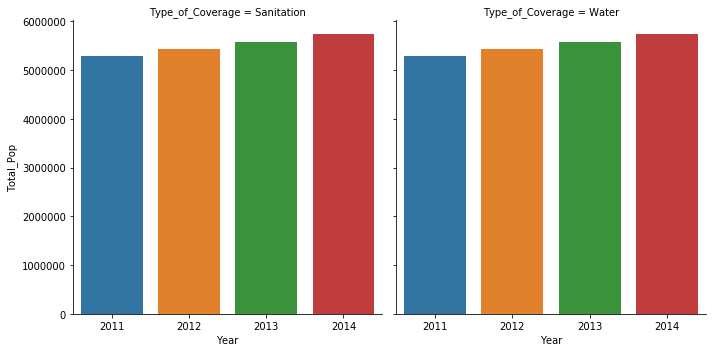

In [49]:
cat_plot('Total_Pop')

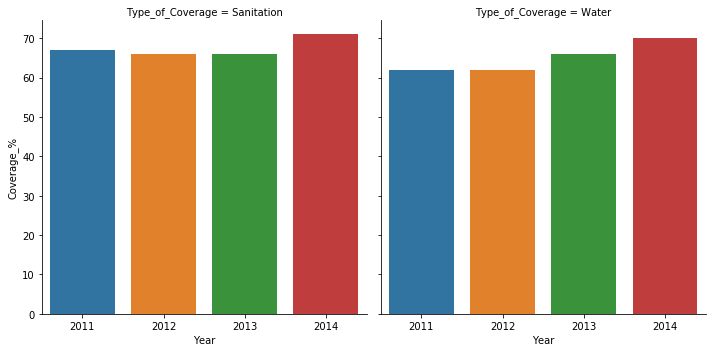

In [50]:
cat_plot('Coverage_%')

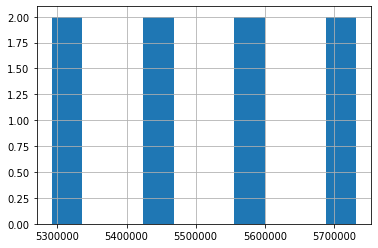

In [51]:
data['Total_Pop'].hist()

## Continous distribution of data

In [59]:
def dist_plot(var, x_label_rotation=0):
    fig, ax = plt.subplots()
    fig.set_size_inches(25, 10)
    sns.distplot(data[var])
    ax.set_xlabel(var, fontsize=30)
    ax.set_ylabel('value counts for '+ var, fontsize=30)
    ax.set_title('Distribution of ' + var, fontsize=30)
    ax.tick_params(labelsize=15)

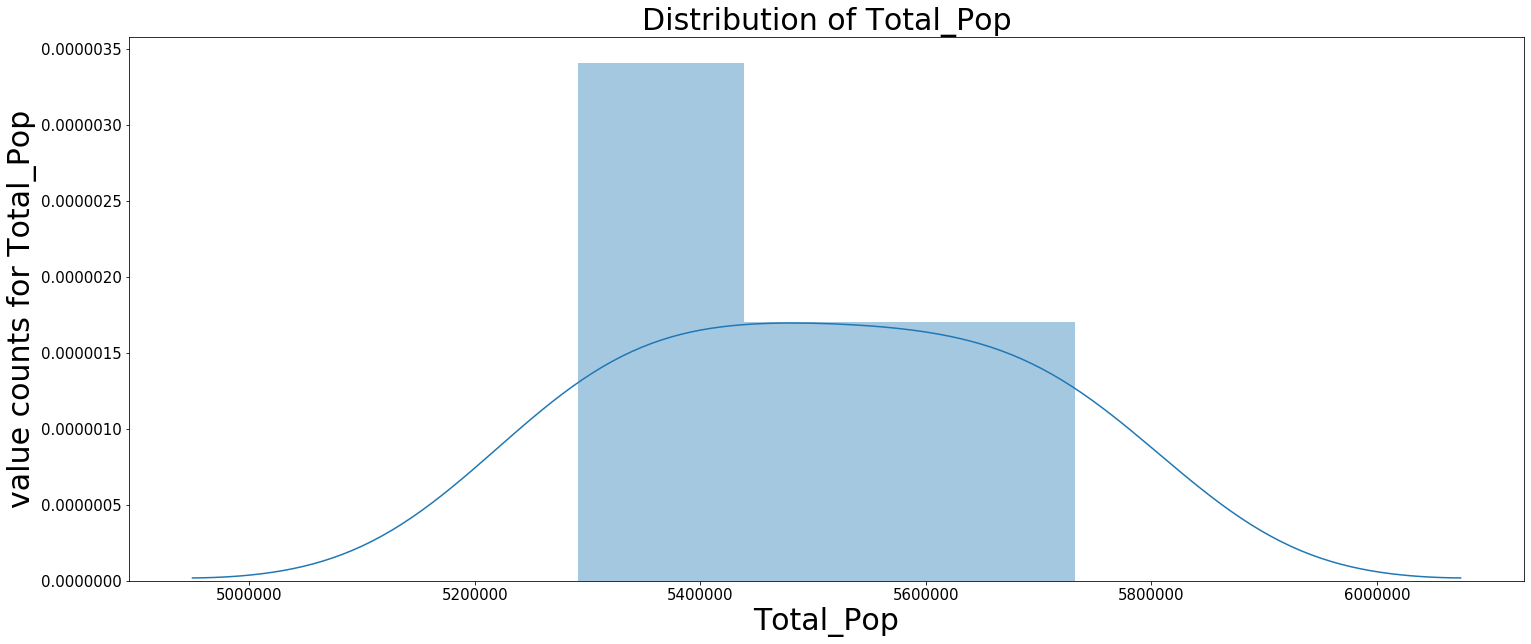

In [60]:
dist_plot('Total_Pop')

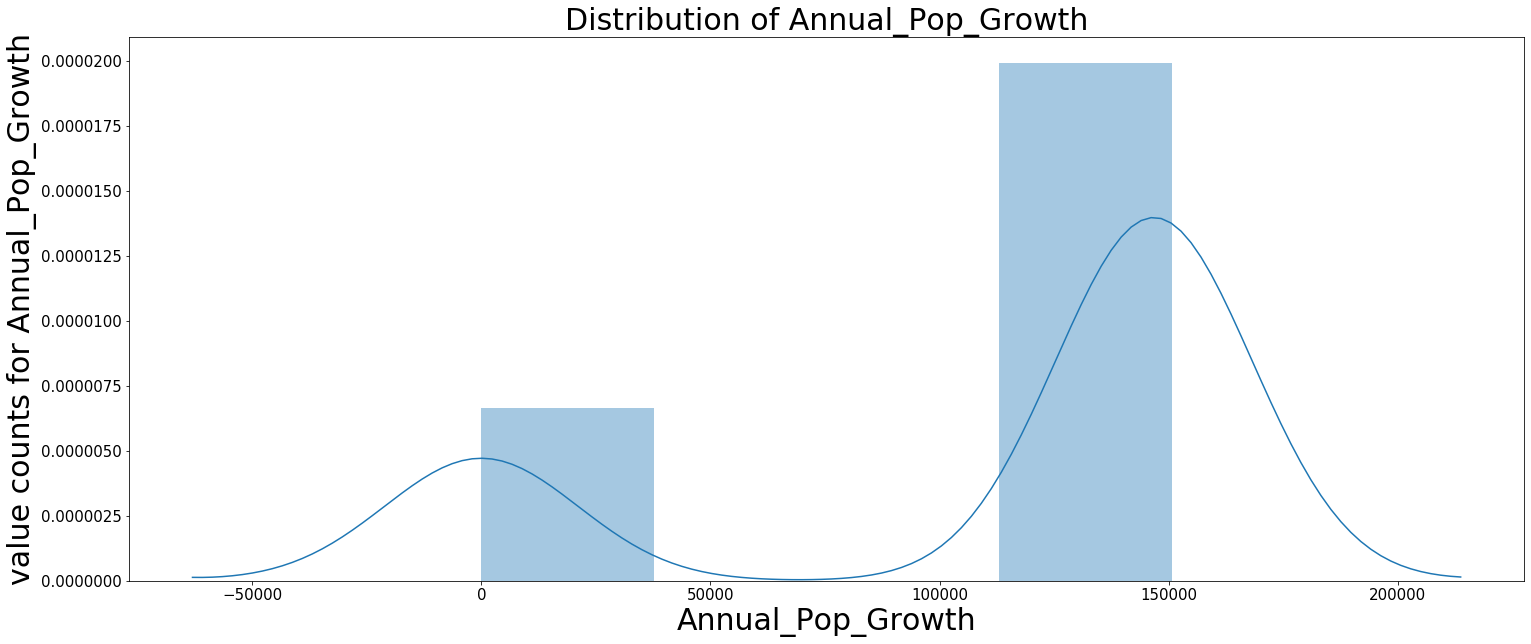

In [61]:
dist_plot('Annual_Pop_Growth')

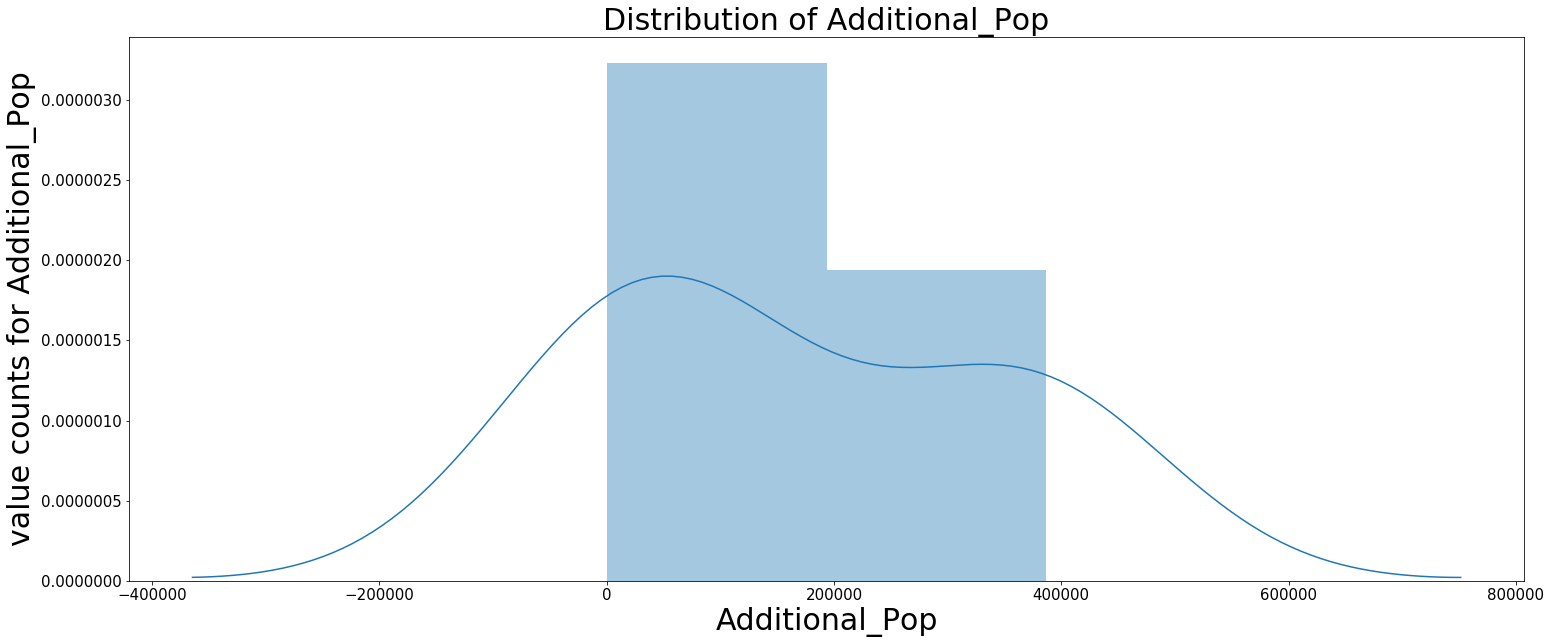

In [62]:
dist_plot('Additional_Pop')

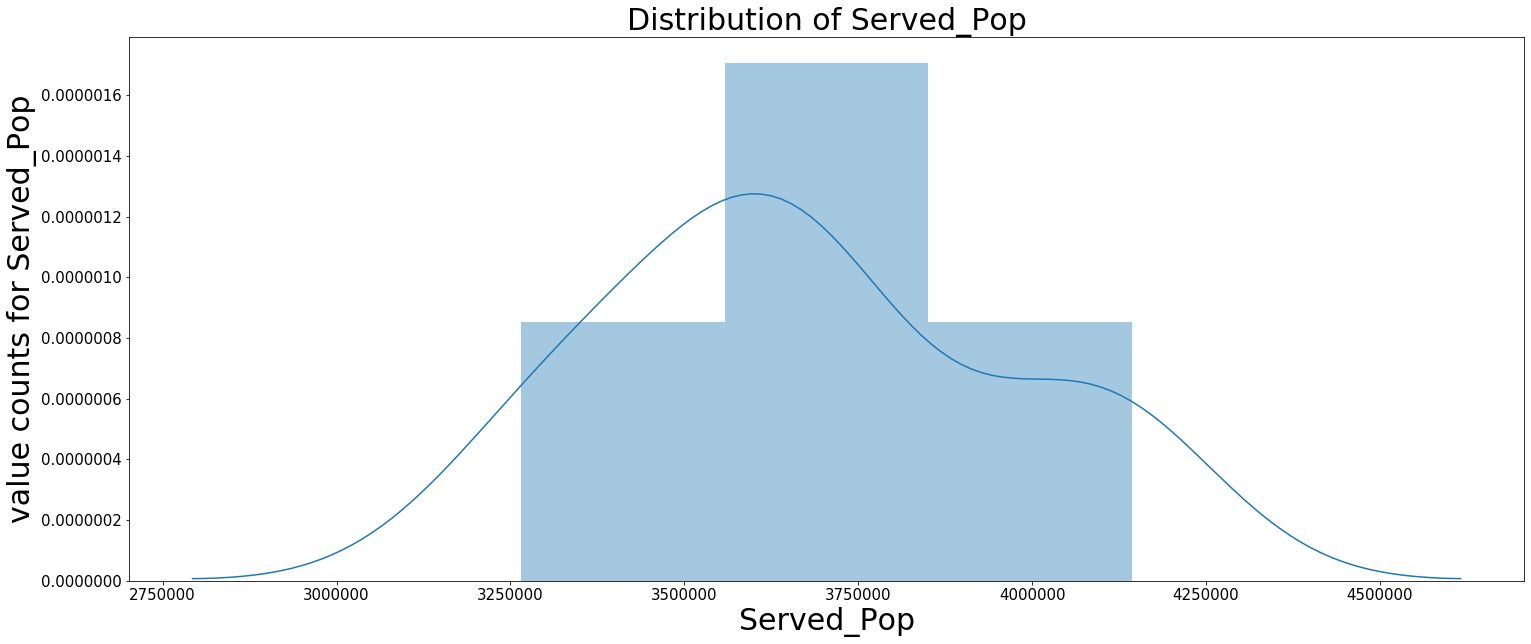

In [63]:
dist_plot('Served_Pop')

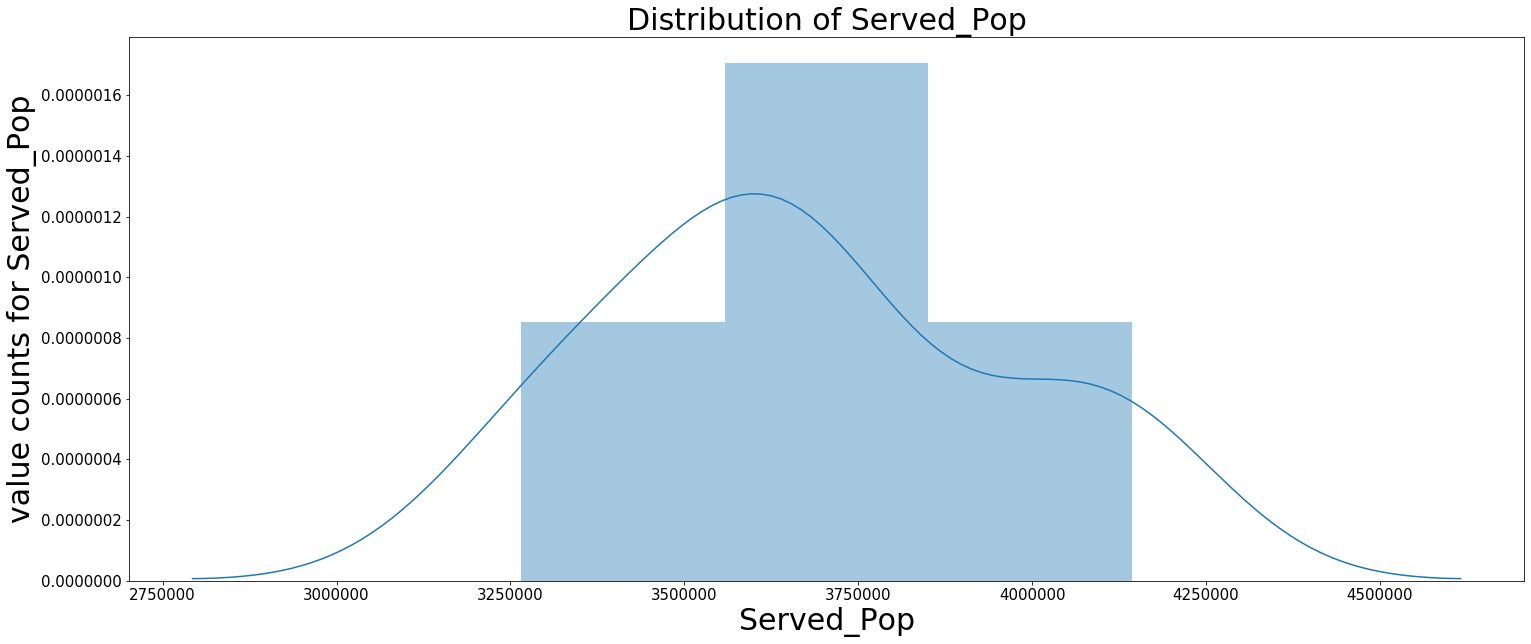

In [64]:
dist_plot('Served_Pop')

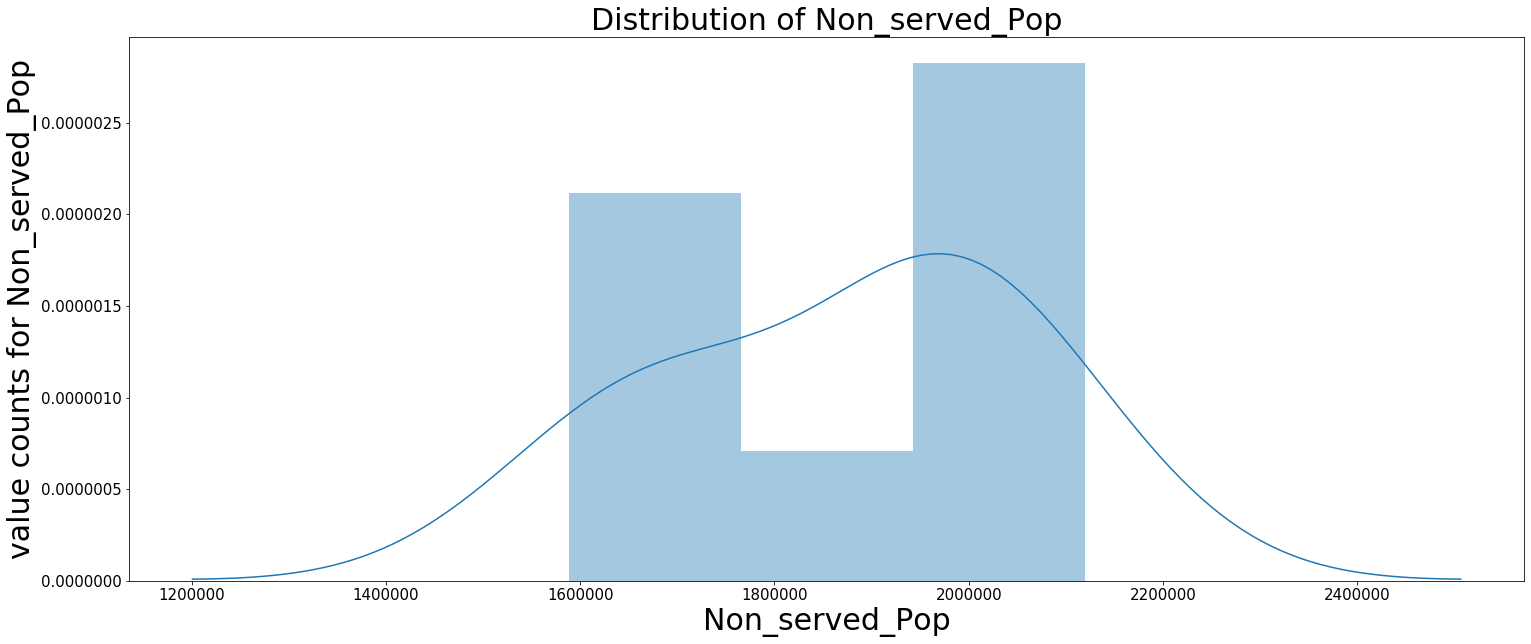

In [65]:
dist_plot('Non_served_Pop')